# Name: Hlay Aliotte
# Class: Advanced Python Programming CIS-2532-NET01
# Homework: 11 
# Author: josephlee94 GitHUb
# Program:  Predicting House Prices

# Exploring and Processing the Data

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('housepricedata.csv')

In [3]:
df

,LotArea,OverallQual,OverallCond,TotalBsmtSF,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea,AboveMedianPrice
0,8450,7,5,856,2,1,3,8,0,548,1
1,9600,6,8,1262,2,0,3,6,1,460,1
2,11250,7,5,920,2,1,3,6,1,608,1
3,9550,7,5,756,1,0,3,7,1,642,0
4,14260,8,5,1145,2,1,4,9,1,836,1
...,...,...,...,...,...,...,...,...,...,...,...
1455,7917,6,5,953,2,1,3,7,1,460,1
1456,13175,6,6,1542,2,0,3,7,2,500,1
1457,9042,7,9,1152,2,0,4,9,2,252,1
1458,9717,5,6,1078,1,0,2,5,0,240,0


In [4]:
dataset = df.values

In [5]:
dataset

array([[ 8450,     7,     5, ...,     0,   548,     1],
       [ 9600,     6,     8, ...,     1,   460,     1],
       [11250,     7,     5, ...,     1,   608,     1],
       ...,
       [ 9042,     7,     9, ...,     2,   252,     1],
       [ 9717,     5,     6, ...,     0,   240,     0],
       [ 9937,     5,     6, ...,     0,   276,     0]], dtype=int64)

In [6]:
X = dataset[:,0:10]
Y = dataset[:,10]

In [7]:
from sklearn import preprocessing

In [8]:
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)

In [9]:
X_scale

array([[0.0334198 , 0.66666667, 0.5       , ..., 0.5       , 0.        ,
        0.3864598 ],
       [0.03879502, 0.55555556, 0.875     , ..., 0.33333333, 0.33333333,
        0.32440056],
       [0.04650728, 0.66666667, 0.5       , ..., 0.33333333, 0.33333333,
        0.42877292],
       ...,
       [0.03618687, 0.66666667, 1.        , ..., 0.58333333, 0.66666667,
        0.17771509],
       [0.03934189, 0.44444444, 0.625     , ..., 0.25      , 0.        ,
        0.16925247],
       [0.04037019, 0.44444444, 0.625     , ..., 0.33333333, 0.        ,
        0.19464034]])

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, Y, test_size=0.3)

In [12]:
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)

In [13]:
print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)

(1022, 10) (219, 10) (219, 10) (1022,) (219,) (219,)


# Building and Training Our First Neural Network

In [14]:
from keras.models import Sequential
from keras.layers import Dense

In [15]:
model = Sequential([
    Dense(32, activation='relu', input_shape=(10,)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid'),
])

In [16]:
model.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [17]:
hist = model.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Epoch 1/100
32/32 [==============================] - 0s 4ms/step - loss: 0.7015 - accuracy: 0.3963 - val_loss: 0.6968 - val_accuracy: 0.4292
Epoch 2/100
32/32 [==============================] - 0s 967us/step - loss: 0.6906 - accuracy: 0.5665 - val_loss: 0.6868 - val_accuracy: 0.6438
Epoch 3/100
32/32 [==============================] - 0s 968us/step - loss: 0.6802 - accuracy: 0.7329 - val_loss: 0.6783 - val_accuracy: 0.6804
Epoch 4/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6723 - accuracy: 0.7182 - val_loss: 0.6722 - val_accuracy: 0.7123
Epoch 5/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6661 - accuracy: 0.7397 - val_loss: 0.6671 - val_accuracy: 0.6986
Epoch 6/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6605 - accuracy: 0.7378 - val_loss: 0.6623 - val_accuracy: 0.6986
Epoch 7/100
32/32 [==============================] - 0s 936us/step - loss: 0.6553 - accuracy: 0.7192 - val_loss: 0.6574 - val_accuracy: 0.7032
Epoch 8

In [18]:
model.evaluate(X_test, Y_test)[1]

7/7 [==============================] - 0s 667us/step - loss: 0.2644 - accuracy: 0.8950


0.8949771523475647

# Visualizing Loss and Accuracy

In [19]:
import matplotlib.pyplot as plt

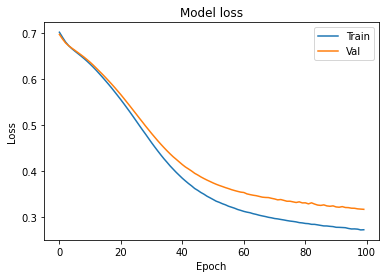

In [20]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

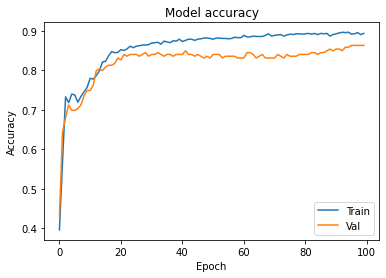

In [30]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

# Adding Regularization to our Neural Network

In [21]:
model_2 = Sequential([
    Dense(1000, activation='relu', input_shape=(10,)),
    Dense(1000, activation='relu'),
    Dense(1000, activation='relu'),
    Dense(1000, activation='relu'),
    Dense(1, activation='sigmoid'),
])
model_2.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
hist_2 = model_2.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Epoch 1/100
32/32 [==============================] - 1s 16ms/step - loss: 0.4789 - accuracy: 0.7661 - val_loss: 0.3773 - val_accuracy: 0.8447
Epoch 2/100
32/32 [==============================] - 0s 14ms/step - loss: 0.3545 - accuracy: 0.8581 - val_loss: 0.3838 - val_accuracy: 0.8402
Epoch 3/100
32/32 [==============================] - 0s 15ms/step - loss: 0.3322 - accuracy: 0.8767 - val_loss: 0.2934 - val_accuracy: 0.8676
Epoch 4/100
32/32 [==============================] - 0s 14ms/step - loss: 0.2950 - accuracy: 0.8816 - val_loss: 0.3279 - val_accuracy: 0.8539
Epoch 5/100
32/32 [==============================] - 0s 15ms/step - loss: 0.2747 - accuracy: 0.8885 - val_loss: 0.2764 - val_accuracy: 0.8721
Epoch 6/100
32/32 [==============================] - 0s 14ms/step - loss: 0.2590 - accuracy: 0.8894 - val_loss: 0.2798 - val_accuracy: 0.8584
Epoch 7/100
32/32 [==============================] - 0s 13ms/step - loss: 0.2519 - accuracy: 0.8982 - val_loss: 0.2925 - val_accuracy: 0.8813
Epoch 

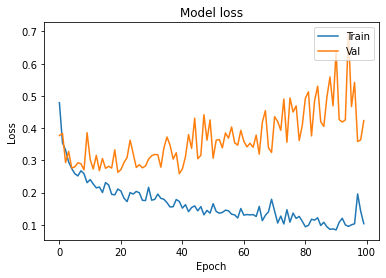

In [22]:
plt.plot(hist_2.history['loss'])
plt.plot(hist_2.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

In [23]:
from keras.layers import Dropout
from keras import regularizers

In [24]:
model_3 = Sequential([
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01), input_shape=(10,)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1, activation='sigmoid', kernel_regularizer=regularizers.l2(0.01)),
])

In [25]:
model_3.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
hist_3 = model_3.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Epoch 1/100
32/32 [==============================] - 1s 24ms/step - loss: 14.2544 - accuracy: 0.6331 - val_loss: 3.9136 - val_accuracy: 0.7854
Epoch 2/100
32/32 [==============================] - 1s 21ms/step - loss: 1.6656 - accuracy: 0.8503 - val_loss: 0.7322 - val_accuracy: 0.8219
Epoch 3/100
32/32 [==============================] - 1s 21ms/step - loss: 0.5736 - accuracy: 0.8659 - val_loss: 0.5750 - val_accuracy: 0.8219
Epoch 4/100
32/32 [==============================] - 1s 22ms/step - loss: 0.5113 - accuracy: 0.8787 - val_loss: 0.5519 - val_accuracy: 0.8493
Epoch 5/100
32/32 [==============================] - 1s 23ms/step - loss: 0.4879 - accuracy: 0.8777 - val_loss: 0.5085 - val_accuracy: 0.8493
Epoch 6/100
32/32 [==============================] - 1s 23ms/step - loss: 0.5284 - accuracy: 0.8503 - val_loss: 0.5069 - val_accuracy: 0.8630
Epoch 7/100
32/32 [==============================] - 1s 22ms/step - loss: 0.4777 - accuracy: 0.8806 - val_loss: 0.5605 - val_accuracy: 0.8311
Epoch

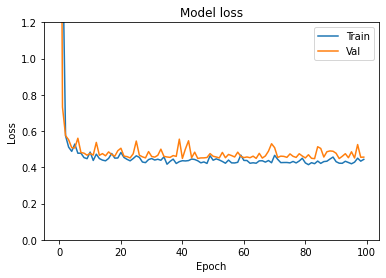

In [26]:
plt.plot(hist_3.history['loss'])
plt.plot(hist_3.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.ylim(top=1.2, bottom=0)
plt.show()

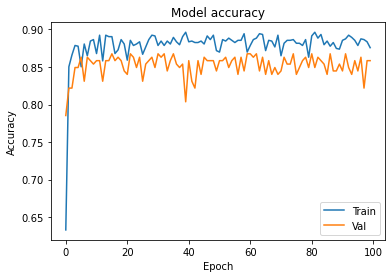

In [31]:
plt.plot(hist_3.history['accuracy'])
plt.plot(hist_3.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()